# Compare CICE with B grid vs C grid results

NB still averaging through the A grid

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import numpy as np

import xarray as xr

I think there are no 1 pixel channels?

In [2]:
kmt_ds = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/cice/kmt.nc')

0.3.0


In [4]:
kmt_ds

<xarray.Dataset>
Dimensions:  (ny: 300, nx: 360)
Dimensions without coordinates: ny, nx
Data variables:
    kmt      (ny, nx) float64 ...
Attributes:
    NCO:      netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, C...
    history:  Thu Oct 15 17:36:00 2020: ncrename -O -v mask,kmt ocean_mask.nc...

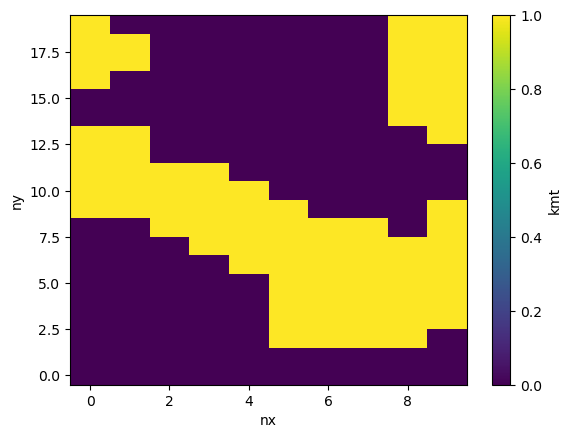

In [3]:
kmt_ds.kmt.isel(nx=slice(205,215),ny=slice(230,250)).plot()

In [5]:
grid_ds = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/cice/grid.nc')

In [6]:
grid_ds

<xarray.Dataset>
Dimensions:     (ny: 300, nx: 360, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/16)
    ulat        (ny, nx) float64 ...
    ulon        (ny, nx) float64 ...
    tlat        (ny, nx) float64 ...
    tlon        (ny, nx) float64 ...
    htn         (ny, nx) float64 ...
    hte         (ny, nx) float64 ...
    ...          ...
    tarea       (ny, nx) float64 ...
    uarea       (ny, nx) float64 ...
    lont_bonds  (nc, ny, nx) float64 ...
    latt_bonds  (nc, ny, nx) float64 ...
    lonu_bonds  (nc, ny, nx) float64 ...
    latu_bonds  (nc, ny, nx) float64 ...

# B - grid

In [8]:
cd /scratch/tm70/as2285/experiments/archive/b_grid

/scratch/tm70/as2285/experiments/archive/b_grid


In [9]:
ls

output000/  restart000/


In [18]:
ds = xr.open_dataset('output004/GMOM_JRA.cice.h.1958-01-05.nc')

In [17]:
! ncdump -v time 'output001/GMOM_JRA.cice.h.1958-01-02.nc'

netcdf GMOM_JRA.cice.h.1958-01-02 {
dimensions:
	nbnd = 2 ;
	ni = 360 ;
	nj = 300 ;
	nc = 5 ;
	nkice = 4 ;
	nksnow = 1 ;
	nkbio = 3 ;
	nkaer = 5 ;
	time = UNLIMITED ; // (1 currently)
	nvertices = 4 ;
	nf = 1 ;
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1958-01-01 00:00:00" ;
		time:calendar = "Gregorian" ;
		time:bounds = "time_bounds" ;
	double time_bounds(time, nbnd) ;
		time_bounds:long_name = "time interval endpoints" ;
		time_bounds:calendar = "Gregorian" ;
		time_bounds:units = "days since 1958-01-01 00:00:00" ;
	double TLON(nj, ni) ;
		TLON:long_name = "T grid center longitude" ;
		TLON:units = "degrees_east" ;
		TLON:missing_value = 1.e+30 ;
		TLON:_FillValue = 1.e+30 ;
	double TLAT(nj, ni) ;
		TLAT:long_name = "T grid center latitude" ;
		TLAT:units = "degrees_north" ;
		TLAT:missing_value = 1.e+30 ;
		TLAT:_FillValue = 1.e+30 ;
	double ULON(nj, ni) ;
		ULON:long_name = "U grid center longitude" ;
		ULON:units = "degrees_east" ;
		U

In [19]:
ds

<xarray.Dataset>
Dimensions:      (time: 1, nbnd: 2, nj: 300, ni: 360, nc: 5, nkice: 4,
                  nksnow: 1, nkbio: 3, nkaer: 5)
Coordinates:
  * time         (time) datetime64[ns] 1958-01-05T12:00:00
    TLON         (nj, ni) float64 ...
    TLAT         (nj, ni) float64 ...
    ULON         (nj, ni) float64 ...
    ULAT         (nj, ni) float64 ...
    NLON         (nj, ni) float64 ...
    NLAT         (nj, ni) float64 ...
    ELON         (nj, ni) float64 ...
    ELAT         (nj, ni) float64 ...
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer
Data variables: (12/38)
    time_bounds  (time, nbnd) datetime64[ns] ...
    NCAT         (nc) float64 ...
    VGRDi        (nkice) float64 ...
    VGRDs        (nksnow) float64 ...
    VGRDb        (nkbio) float64 ...
    VGRDa        (nkaer) float64 ...
    ...           ...
    frzmlt       (time, nj, ni) float64 ...
    congel       (time, nj, ni) float64 ...
    frazil       (time, nj, ni) float64 ...
    snoice       (time, nj, ni) float64 ...
    dvidtt       (time, nj, ni) float64 ...
    dvidtd       (time, nj, ni) float64 ...
Attributes:
    title:               GMOM_JRA
    contents:            Diagnostic and Prognostic Variables
    source:              Los Alamos Sea Ice Model, unknown_version_name
    comment:             This year has 365 days
    comment2:            File written on model date 19580106
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-02-22 at 11:16
    io_flavor:           io_pio netcdf

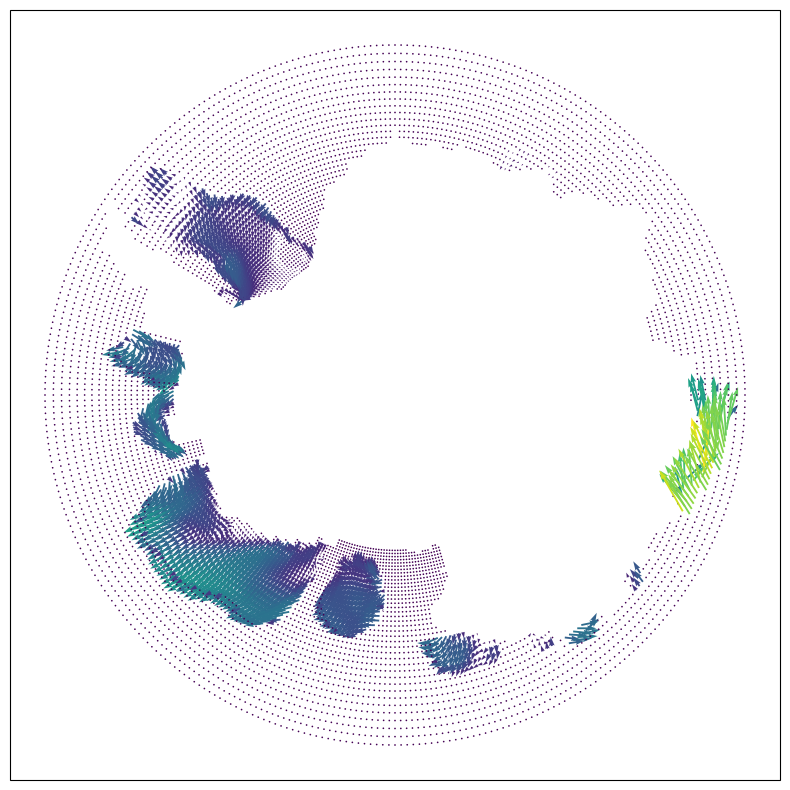

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(projection=ccrs.SouthPolarStereo())

pds=ds.isel(nj=slice(0,40))

plt.quiver(
    pds.ULON.values, pds.ULAT.values, 
    pds.uvel[0].values, pds.vvel[0].values,
    np.hypot(pds.uvel[0].values,pds.vvel[0].values), transform=ccrs.PlateCarree()
)

# C - grid

In [2]:
cd /scratch/tm70/as2285/experiments/archive/c_grid

/scratch/tm70/as2285/experiments/archive/c_grid


In [3]:
ls

output000/  output002/  output004/   restart001/  restart003/
output001/  output003/  restart000/  restart002/  restart004/


In [4]:
ds = xr.open_dataset('output004/GMOM_JRA.cice.h.1958-01-05.nc')

0.3.0


In [7]:
! ncdump -v time 'output004/GMOM_JRA.cice.h.1958-01-05.nc'

netcdf GMOM_JRA.cice.h.1958-01-05 {
dimensions:
	nbnd = 2 ;
	ni = 360 ;
	nj = 300 ;
	nc = 5 ;
	nkice = 4 ;
	nksnow = 1 ;
	nkbio = 3 ;
	nkaer = 5 ;
	time = UNLIMITED ; // (1 currently)
	nvertices = 4 ;
	nf = 1 ;
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 0000-01-01 00:00:00" ;
		time:calendar = "noleap" ;
		time:bounds = "time_bounds" ;
	double time_bounds(time, nbnd) ;
		time_bounds:long_name = "time interval endpoints" ;
		time_bounds:units = "days since 0000-01-01 00:00:00" ;
		time_bounds:calendar = "noleap" ;
	double TLON(nj, ni) ;
		TLON:long_name = "T grid center longitude" ;
		TLON:units = "degrees_east" ;
		TLON:missing_value = 1.e+30 ;
		TLON:_FillValue = 1.e+30 ;
	double TLAT(nj, ni) ;
		TLAT:long_name = "T grid center latitude" ;
		TLAT:units = "degrees_north" ;
		TLAT:missing_value = 1.e+30 ;
		TLAT:_FillValue = 1.e+30 ;
	double ULON(nj, ni) ;
		ULON:long_name = "U grid center longitude" ;
		ULON:units = "degrees_east" ;
		ULON:mi

In [5]:
ds

<xarray.Dataset>
Dimensions:      (time: 1, nbnd: 2, nj: 300, ni: 360, nc: 5, nkice: 4,
                  nksnow: 1, nkbio: 3, nkaer: 5)
Coordinates:
  * time         (time) object 1959-04-25 12:00:00
    TLON         (nj, ni) float64 ...
    TLAT         (nj, ni) float64 ...
    ULON         (nj, ni) float64 ...
    ULAT         (nj, ni) float64 ...
    NLON         (nj, ni) float64 ...
    NLAT         (nj, ni) float64 ...
    ELON         (nj, ni) float64 ...
    ELAT         (nj, ni) float64 ...
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer
Data variables: (12/42)
    time_bounds  (time, nbnd) object ...
    NCAT         (nc) float64 ...
    VGRDi        (nkice) float64 ...
    VGRDs        (nksnow) float64 ...
    VGRDb        (nkbio) float64 ...
    VGRDa        (nkaer) float64 ...
    ...           ...
    frzmlt       (time, nj, ni) float64 ...
    congel       (time, nj, ni) float64 ...
    frazil       (time, nj, ni) float64 ...
    snoice       (time, nj, ni) float64 ...
    dvidtt       (time, nj, ni) float64 ...
    dvidtd       (time, nj, ni) float64 ...
Attributes:
    title:               GMOM_JRA
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19580106
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-02-21 at 10:05
    io_flavor:           io_pio2 hdf5

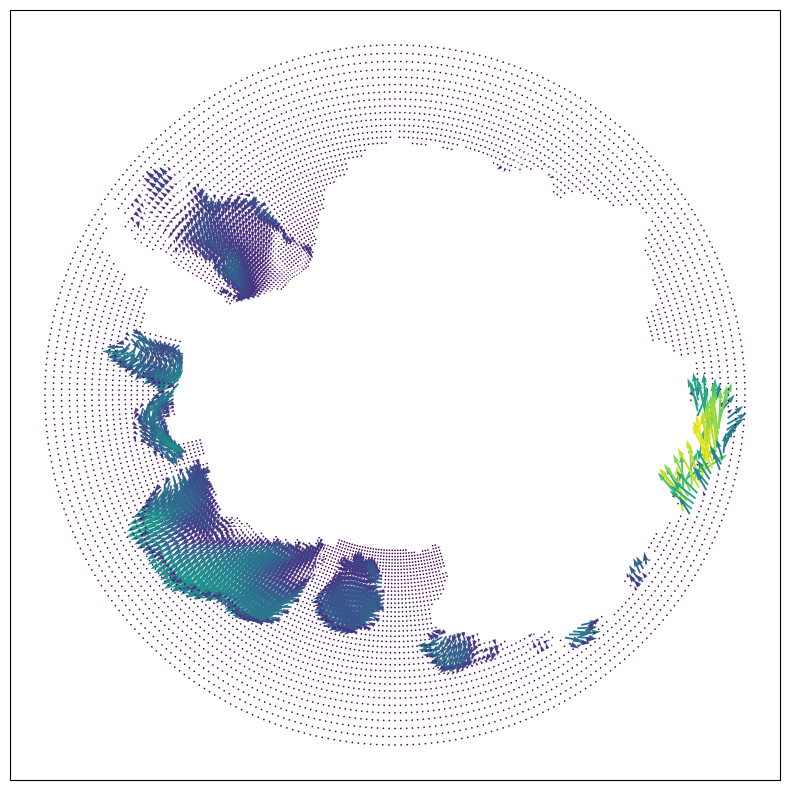

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(projection=ccrs.SouthPolarStereo())

pds=ds.isel(nj=slice(0,40))

plt.quiver(
    pds.ULON.values, pds.ULAT.values, 
    pds.uvel[0].values, pds.vvel[0].values,
    np.hypot(pds.uvel[0].values,pds.vvel[0].values), transform=ccrs.PlateCarree()
)

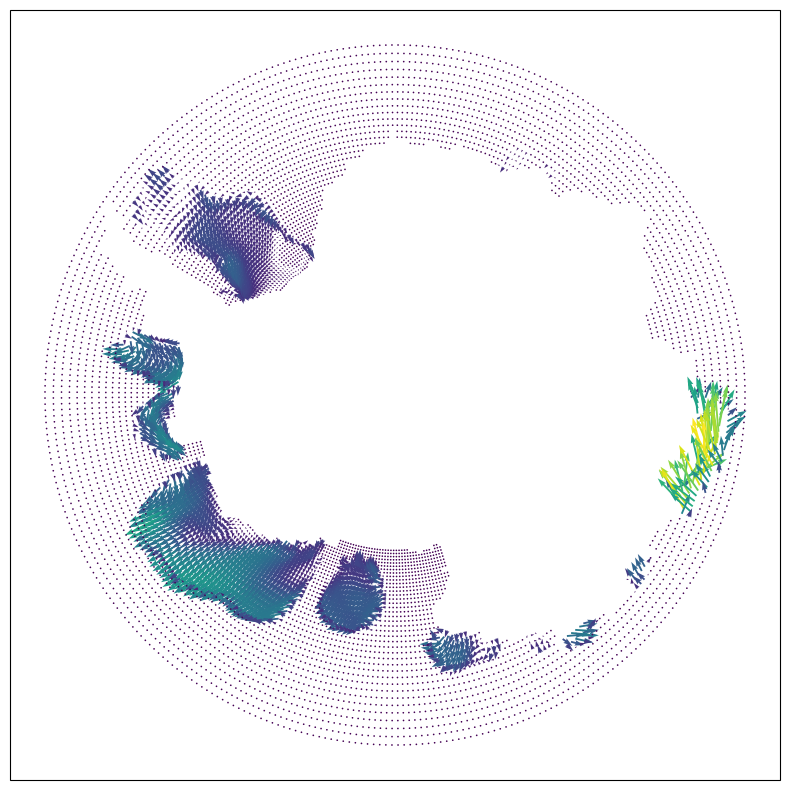

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(projection=ccrs.SouthPolarStereo())

pds=ds.isel(nj=slice(0,40))

plt.quiver(
    pds.NLON.values, pds.NLAT.values, 
    pds.uvelN[0].values, pds.vvelN[0].values,
    np.hypot(pds.uvelN[0].values,pds.vvelN[0].values), transform=ccrs.PlateCarree()
)

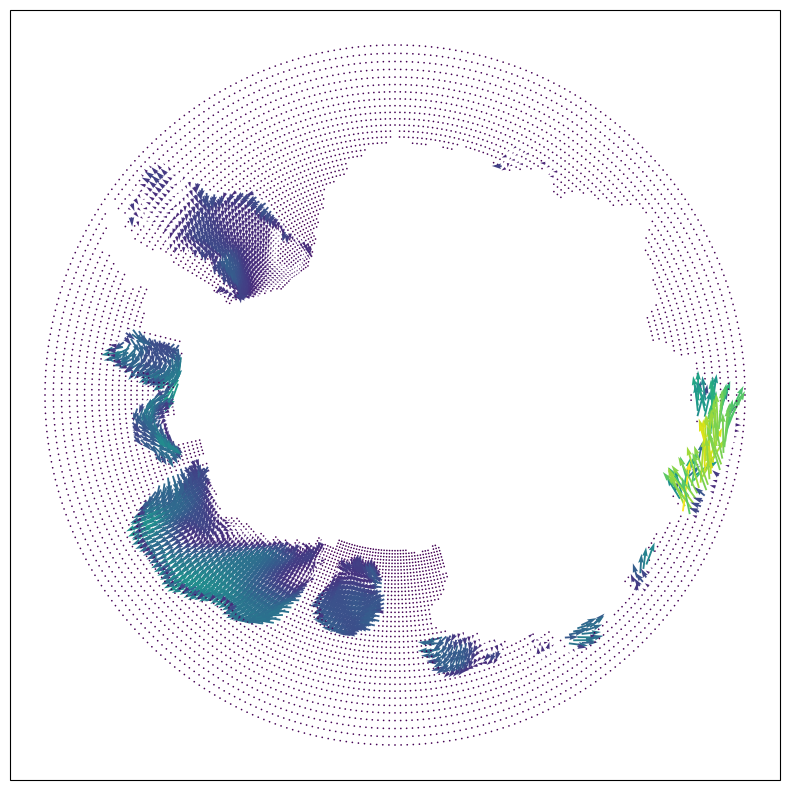

In [32]:
plt.figure(figsize=(10,10))

plt.subplot(projection=ccrs.SouthPolarStereo())

pds=ds.isel(nj=slice(0,40))

plt.quiver(
    pds.ELON.values, pds.ELAT.values, 
    pds.uvelE[0].values, pds.vvelE[0].values,
    np.hypot(pds.uvelE[0].values,pds.vvelE[0].values), transform=ccrs.PlateCarree()
)